### Initial setup

## Import standard packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Import time series data: Airline Passenger data

In [5]:
data = pd.read_csv('airline-passenger-traffic+(1).csv',header=None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'],format = '%Y-%m')
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### Time Series analysis

### Plot the time series data

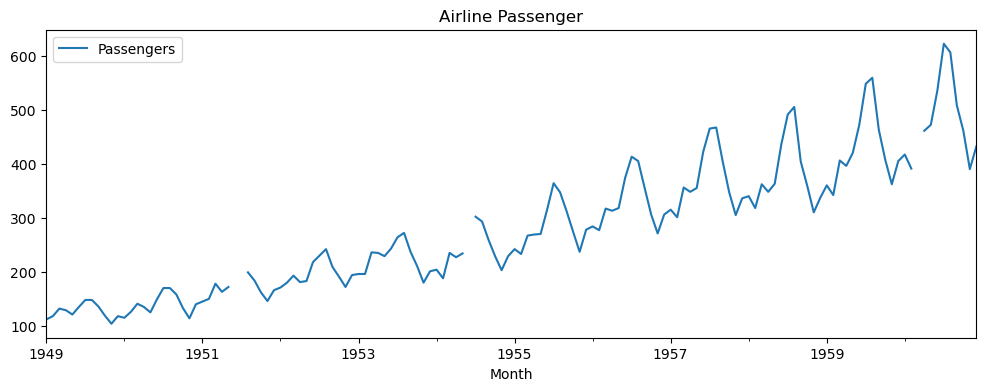

In [6]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passenger')
plt.show(block=False)

### Missing value treatment

### Mean imputation

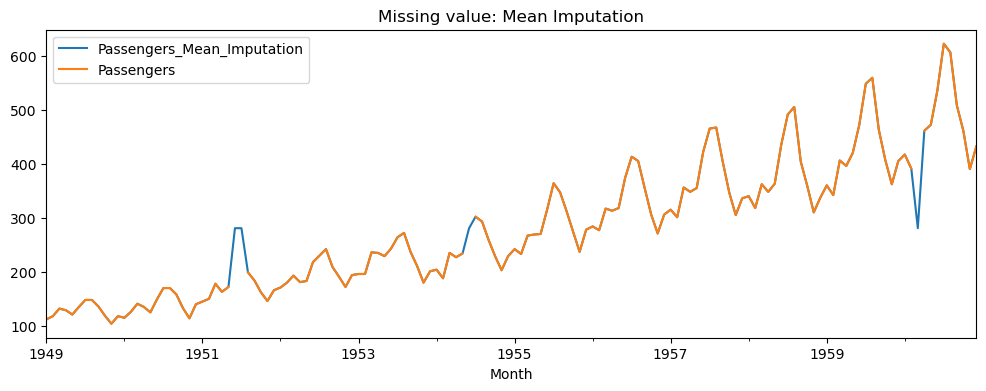

In [12]:
data['Passengers_Mean_Imputation'] = data.Passengers.fillna(data.Passengers.mean())
data['Passengers_Mean_Imputation'].plot(figsize=(12,4))
data['Passengers'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing value: Mean Imputation')
plt.show()

### Linear Interpolation 

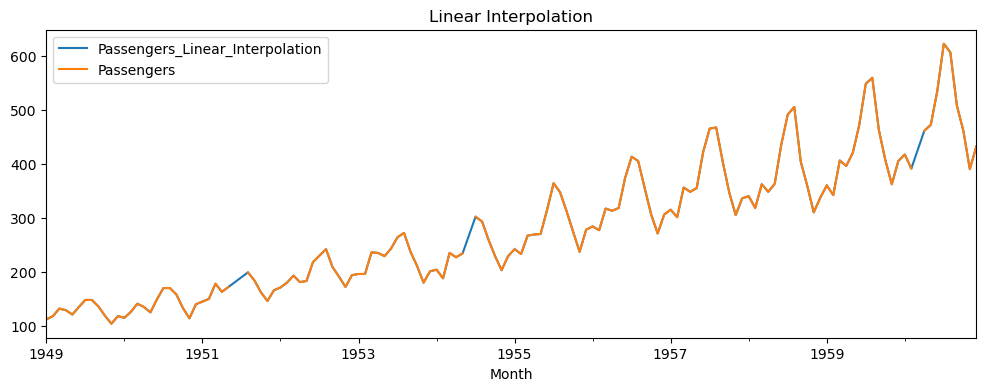

In [14]:
data['Passengers_Linear_Interpolation']=data.Passengers.fillna(data.Passengers.interpolate(method='linear'))
data['Passengers_Linear_Interpolation'].plot(figsize=(12,4))
data['Passengers'].plot()
plt.legend(loc='best')
plt.title('Linear Interpolation')
plt.show(block=False)

- Use linear interpolation to impute missing values

In [15]:
data['Passengers'] = data['Passengers_Linear_Interpolation']

### Outlier Detection

### Box plot and interquartile range

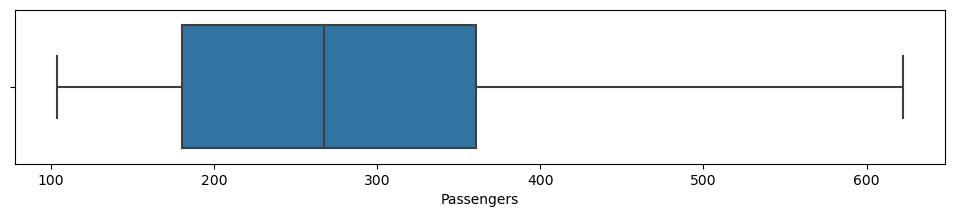

In [16]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data['Passengers'],whis=1.5)

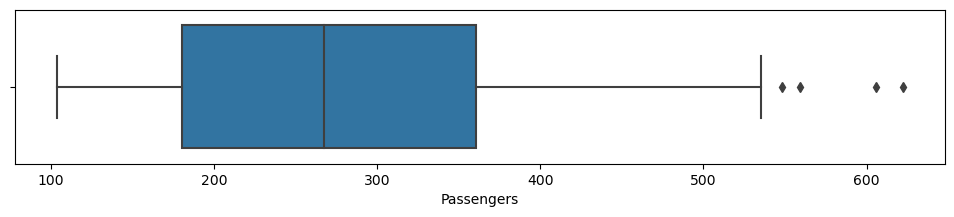

In [17]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data['Passengers'],whis=1)

In [19]:
data[data['Passengers']>540]

,Passengers,Passengers_Mean_Imputation,Passengers_Linear_Interpolation
Month,,,
1959-07-01,548.0,548.0,548.0
1959-08-01,559.0,559.0,559.0
1960-07-01,622.0,622.0,622.0
1960-08-01,606.0,606.0,606.0


- In case of our boxplot also treating values beyond 540 to be outliers is not appropriate since these increase in values are a part of trend of the time series

### Plotting a historgram

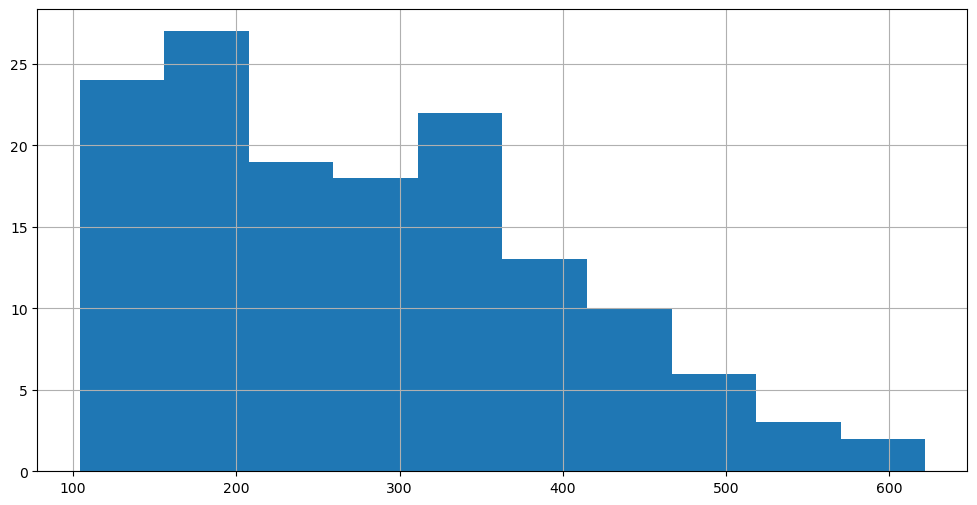

In [21]:
fig = data.Passengers.hist(figsize=(12,6))

- There is no discontinuous extreme values to be treated as outliers.
- We can conclude there are no outliers in the dataset.

## Time series decomposition

### Additive seasonal decomposition

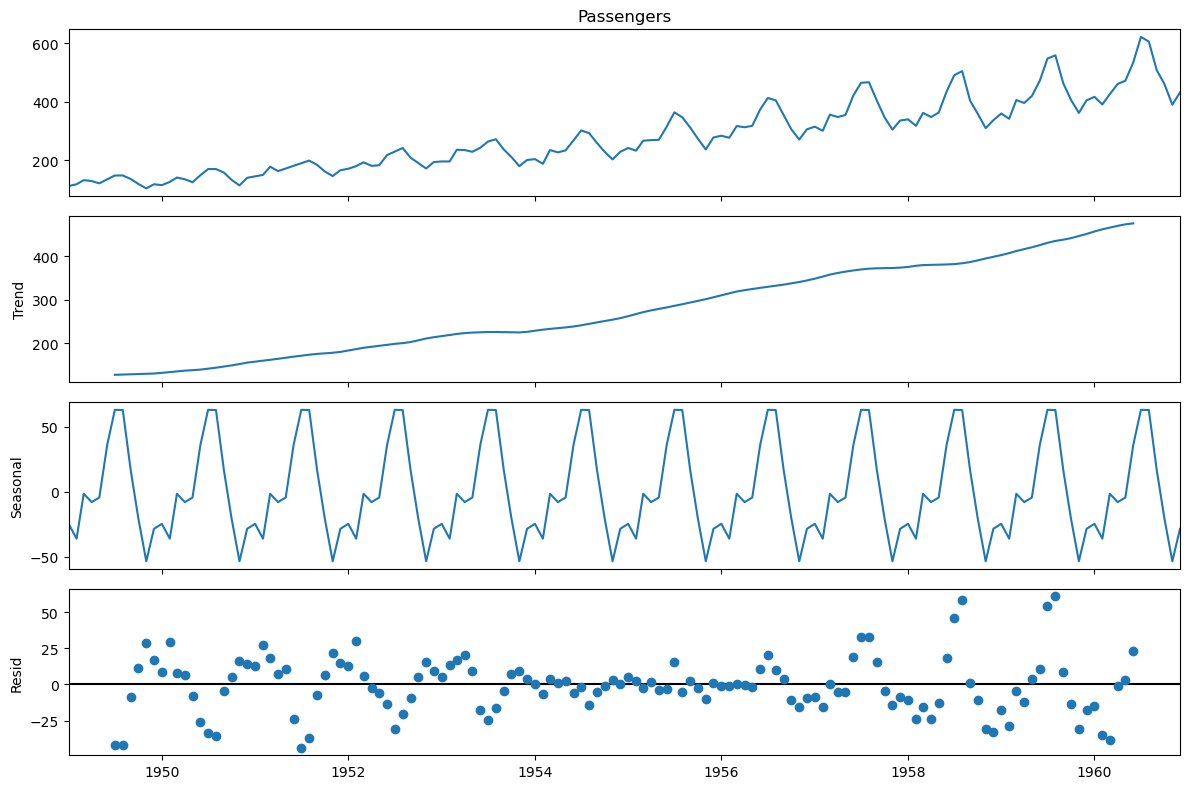

In [22]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']=12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers,model='additive')
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

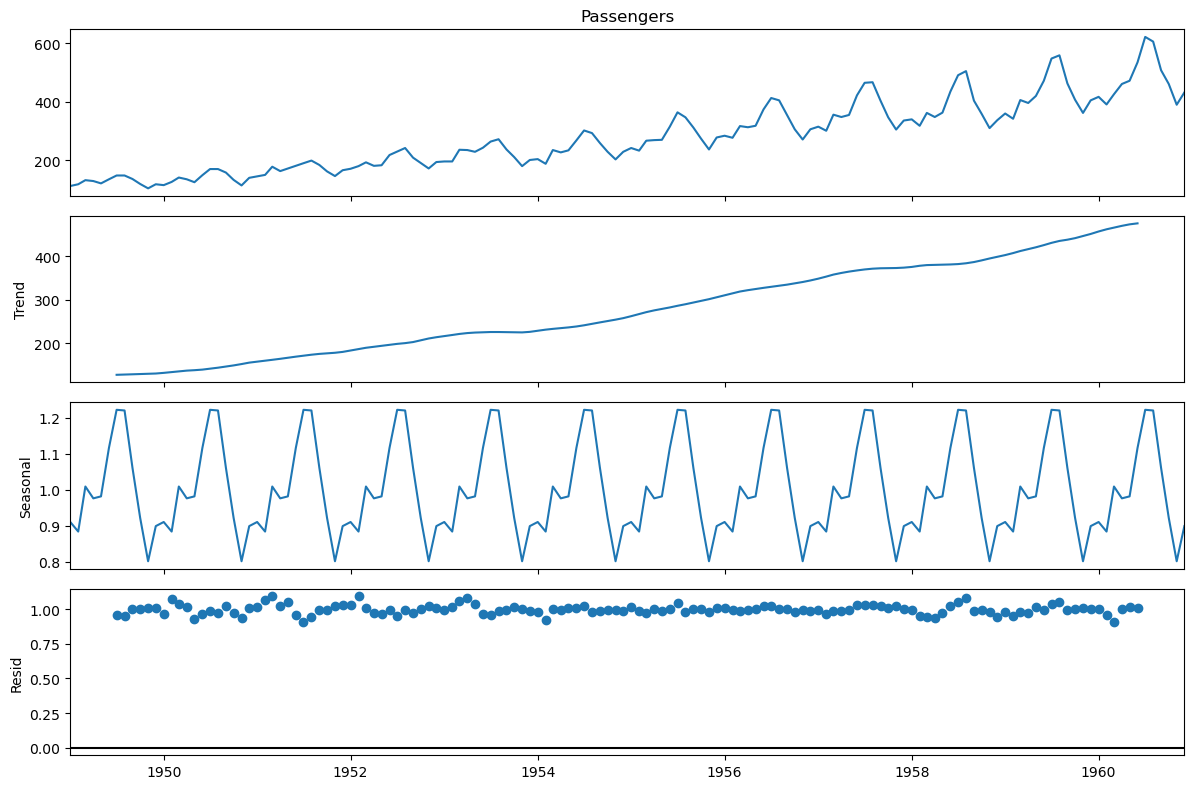

In [26]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers,model='multiplicative')
fig = decomposition.plot()
plt.show()

## Build and evaluate time series forecast 

In [29]:
### Splitting time series data into Training and Test sets
train_len = 120
train = data[:train_len]
test = data[train_len:]

### Naive Method

In [30]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

### Plot train, test and forecast

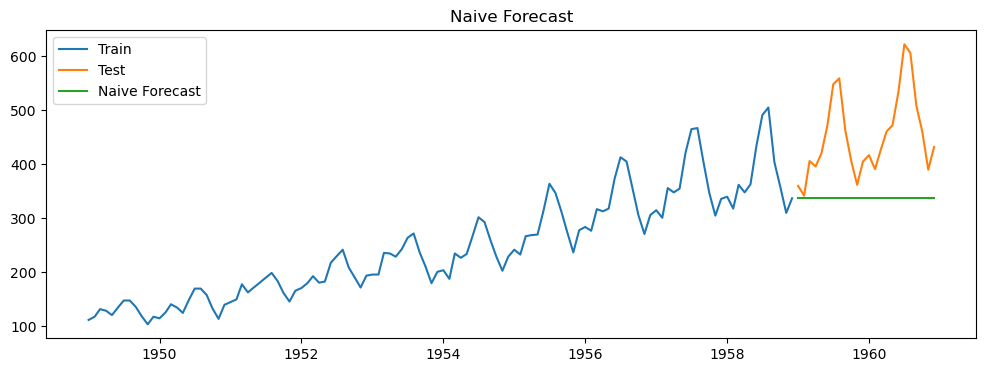

In [32]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_naive['naive_forecast'],label='Naive Forecast')
plt.title('Naive Forecast')
plt.legend(loc='best')
plt.show()

### Calculate EMSE and MAPE to evaluate forecast

In [38]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'],y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean((np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100),2)

results = pd.DataFrame({'Method':['Naive Method'],
                       'MAPE':[mape],
                       'RMSE':[rmse]})
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63


### Simple Average Method

In [33]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

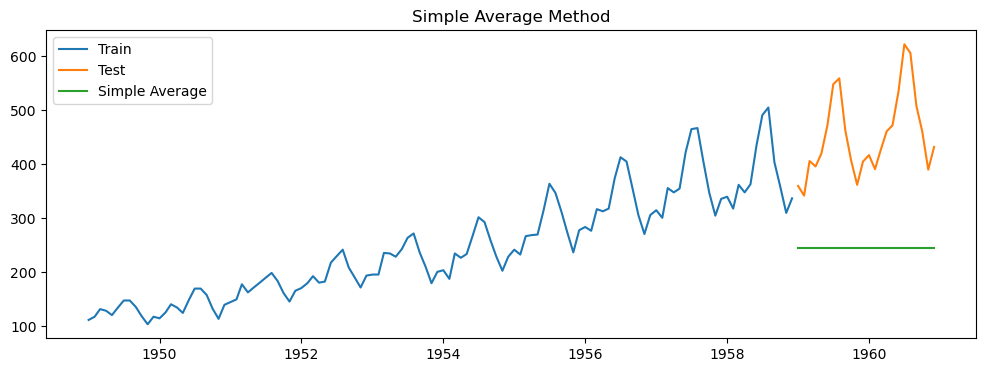

In [34]:
## Plotting train, test and forecasting data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_avg['avg_forecast'],label='Simple Average')
plt.title('Simple Average Method')
plt.legend(loc='best')
plt.show()

In [49]:
## Calculate RMSE and MAPE for simple average method
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_avg['avg_forecast']))).round(2)
mape = np.round(np.mean((np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100),2)

results.loc[len(results)] = ['Simple Average Method',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28


### Simple Moving Average

In [55]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

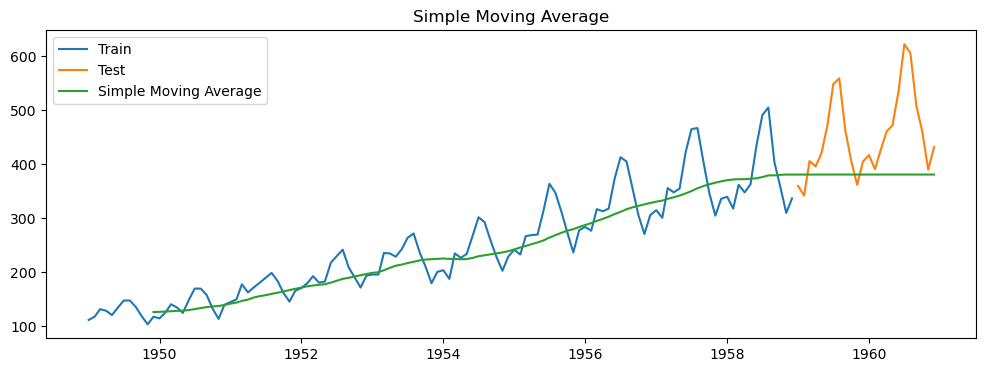

In [56]:
### PLot train, test and forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_sma['sma_forecast'],label='Simple Moving Average')
plt.legend(loc='best')
plt.title('Simple Moving Average')
plt.show()

In [57]:
## rmse and mape values
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_sma['sma_forecast'][train_len:]))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers']))*100,2)
results.loc[len(results)] = ['Simple Moving Average',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54


In [58]:
## Changing the moving average to 6 months
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

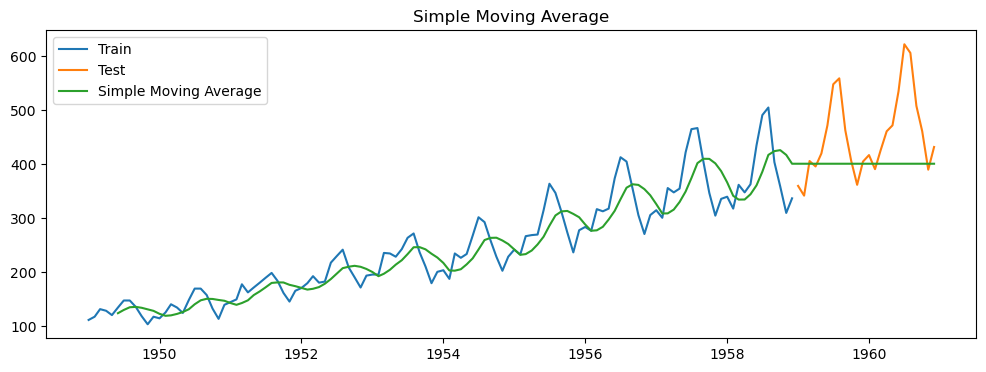

In [59]:
### PLot train, test and forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_sma['sma_forecast'],label='Simple Moving Average')
plt.legend(loc='best')
plt.title('Simple Moving Average')
plt.show()

In [60]:
## Changing the moving average to 3 months
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

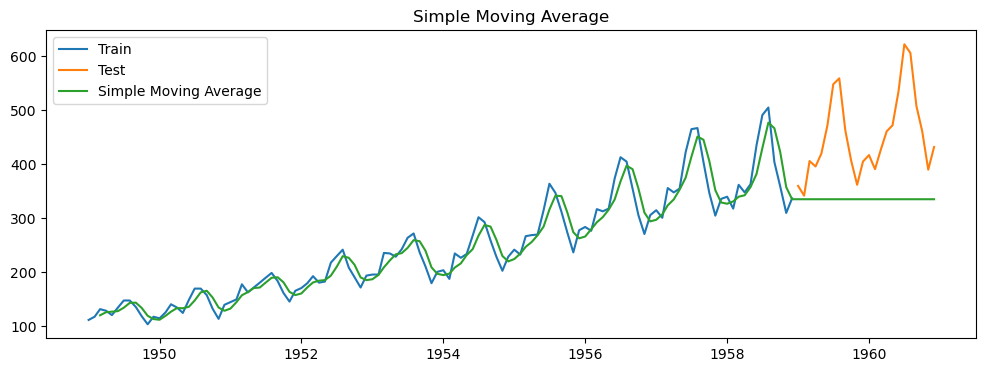

In [61]:
### PLot train, test and forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_sma['sma_forecast'],label='Simple Moving Average')
plt.legend(loc='best')
plt.title('Simple Moving Average')
plt.show()

## Simple Exponential Smoothing

In [62]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2, optimized=False) ## optimized is false since we are explicitly giving smoothing level value
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


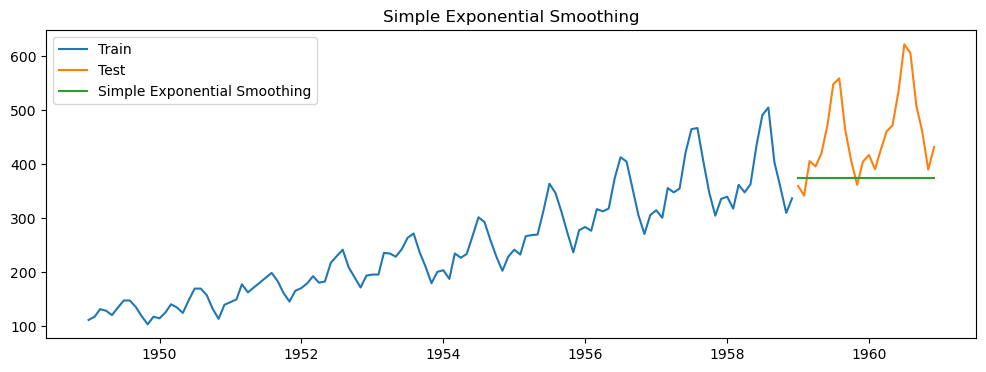

In [63]:
## Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_ses['ses_forecast'],label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()

In [65]:
## calculate rmse and mape
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_ses['ses_forecast']))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers']))*100,2)
results.loc[len(results)] = ['Simple Exponential Smoothing',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54
3,Simple Exponential Smoothing,107.65,16.49


### Holt's Exponential Smoothing

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']),seasonal_periods=12,trend='additive',seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01,optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 118.4666666666666, 'initial_trend': 2.060606060606069, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


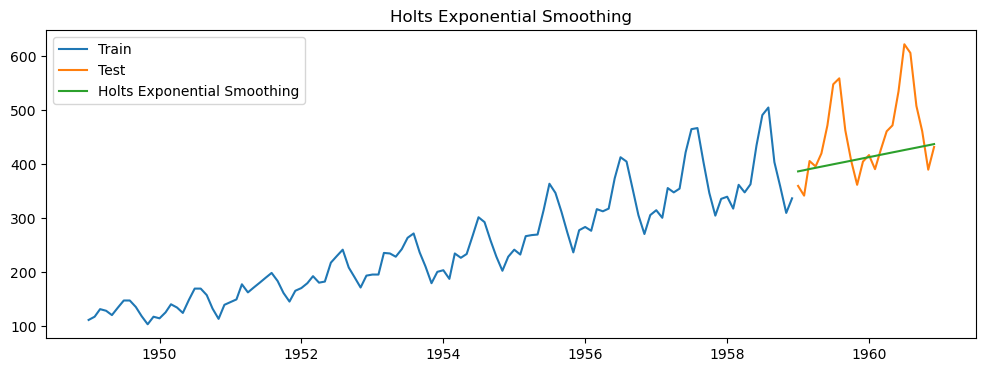

In [72]:
## Plotting the train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_holt['holt_forecast'],label='Holts Exponential Smoothing')
plt.legend(loc='best')
plt.title('Holts Exponential Smoothing')
plt.show()

In [73]:
## calculate rmse and mape
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_holt['holt_forecast']))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers']))*100,2)
results.loc[len(results)] = ['Holts Exponential Smoothing',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54
3,Simple Exponential Smoothing,107.65,16.49
4,Holts Exponential Smoothing,80.91,11.39


## Holt Winters Additive Method

In [92]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']),seasonal_periods=12,trend='add',seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2361171978116132, 'smoothing_trend': 7.679615363850196e-11, 'smoothing_seasonal': 0.7638828018270181, 'damping_trend': nan, 'initial_level': 119.14045289095831, 'initial_trend': 2.2766888689244404, 'initial_seasons': array([ -9.41693238,  -3.89040624,   8.62486483,   3.53570972,
        -5.16150036,   8.98263745,  21.24863145,  19.32984306,
         5.24250075, -13.60564542, -28.28759186, -12.13664608]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


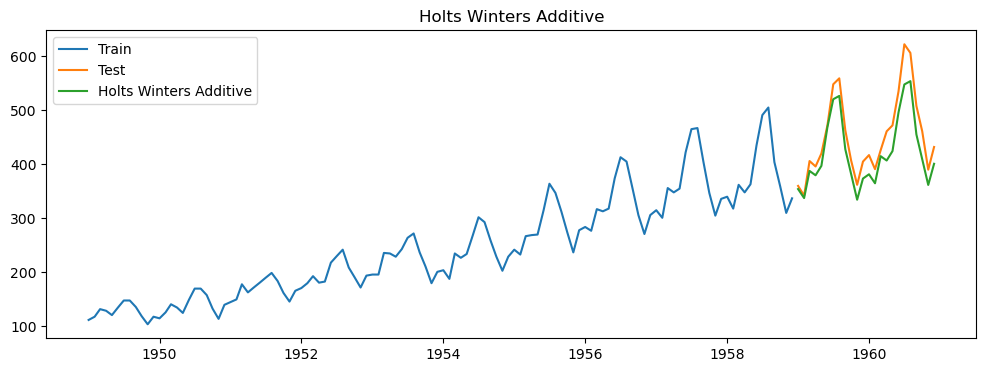

In [93]:
## Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_hwa['hwa_forecast'],label='Holts Winters Additive')
plt.legend(loc='best')
plt.title('Holts Winters Additive')
plt.show()

In [94]:
## calculate rmse and mape
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_hwa['hwa_forecast']))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_hwa['hwa_forecast'])/test['Passengers']))*100,2)
results.loc[len(results)] = ['Holt Winters Additive Method',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54
3,Simple Exponential Smoothing,107.65,16.49
4,Holts Exponential Smoothing,80.91,11.39
5,Holt Winters Additive Method,35.87,6.72


### Holt Winters Multiplicative Method

In [95]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']),seasonal_periods=12,trend='add',seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.3655776181336739, 'smoothing_trend': 7.000160790713375e-07, 'smoothing_seasonal': 0.6344221915208443, 'damping_trend': nan, 'initial_level': 100.91058555806529, 'initial_trend': 2.1854790058193623, 'initial_seasons': array([1.08633829, 1.14268054, 1.25600203, 1.19404046, 1.10209938,
       1.205238  , 1.31063023, 1.30172641, 1.18746833, 1.03480496,
       0.91994195, 1.06136388]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


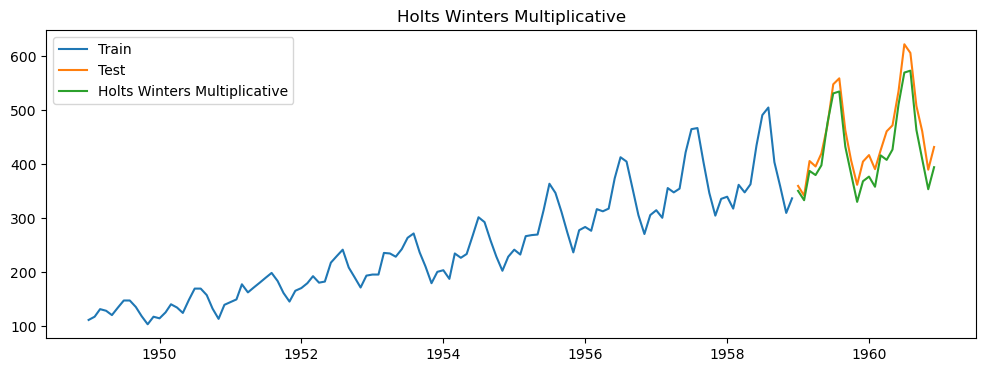

In [96]:
## Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_hwm['hwm_forecast'],label='Holts Winters Multiplicative')
plt.legend(loc='best')
plt.title('Holts Winters Multiplicative')
plt.show()

In [97]:
## calculate rmse and mape
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_hwm['hwm_forecast']))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_hwm['hwm_forecast'])/test['Passengers']))*100,2)
results.loc[len(results)] = ['Holt Winters Multiplicative Method',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54
3,Simple Exponential Smoothing,107.65,16.49
4,Holts Exponential Smoothing,80.91,11.39
5,Holt Winters Additive Method,35.87,6.72
6,Holt Winters Multiplicative Method,32.45,6.45


## Auto Regressive Models

### Stationary vs Non-Stationary Time series

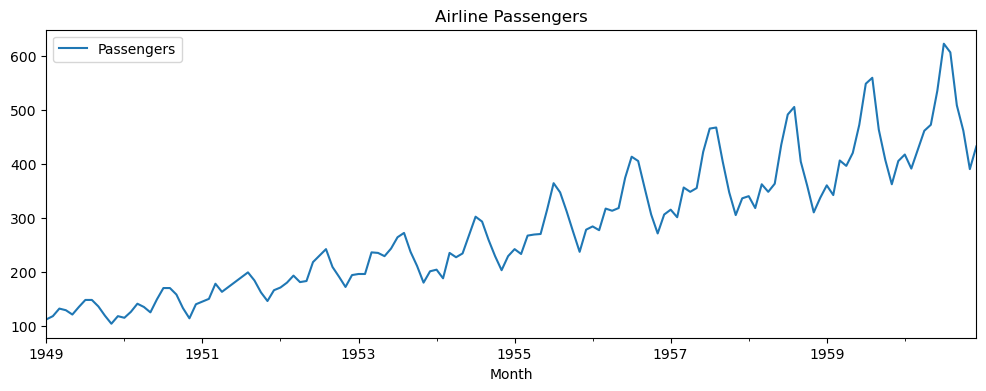

In [99]:
data['Passengers'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Airline Passengers')
plt.show()

### Augmented Dickey-Fuller Test(ADF)

In [109]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])

print('ADF statistic: %.2f' % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF statistic: 0.89
Critical value @ 0.05: -2.88
p-value: 0.993020


- Here since p-value>0.05 we fail to reject null hypothesis. Since we fail to reject null hypothesis the time series is not stationary.

### KPSS test

In [114]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

print('KPSS Statistic: %.2f' % kpss_test[0])
print('Critical Value: @ 0.05: %0.2f' %kpss_test[3]['5%'])
print('p-value: %f' %kpss_test[1])

KPSS Statistic: 1.65
Critical Value: @ 0.05: 0.46
p-value: 0.010000


C:\Users\Prince\AppData\Local\Temp\ipykernel_8776\2656273995.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(data['Passengers'])


- Here p value<0.05 and hence we reject null hypothesis. Here the series is not stationary.

### Box -cox Transformation

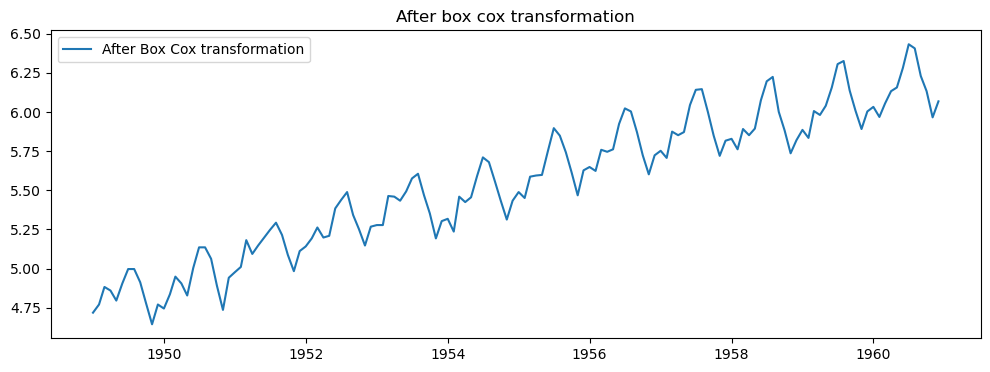

In [117]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'],lmbda=0),index=data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox,label='After Box Cox transformation')
# plt.plot(data['Passengers'],label='Before Box cox transformation')
plt.legend(loc='best')
plt.title('After box cox transformation')
plt.show()

- Here we have made the variance constant. Now let's take out the trend of time series.

### Differencing 

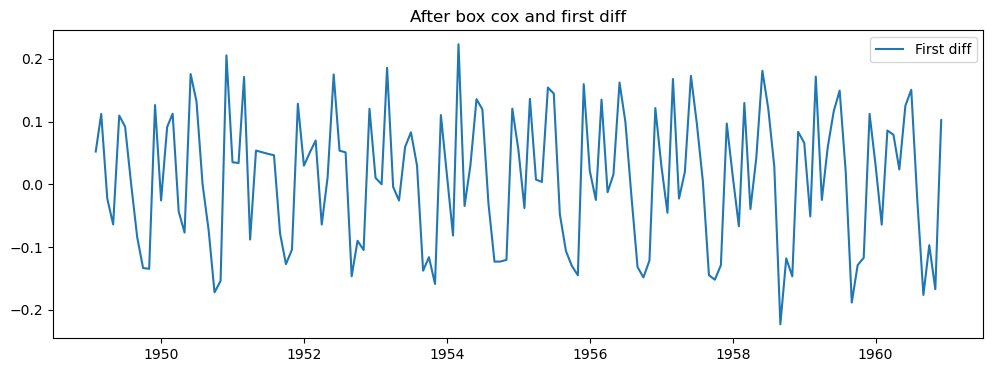

In [118]:
data_boxcox_diff = pd.Series(data_boxcox-data_boxcox.shift(),index=data.index)
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff,label='First diff')
plt.legend(loc='best')
plt.title('After box cox and first diff')
plt.show()

### ADF test

In [119]:
adf_test = adfuller(data_boxcox_diff)

print('ADF statistic: %.2f' % adf_test[0])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF statistic: -3.29
Critical value @ 0.05: -2.88
p-value: 0.015326


- Since p value< 0.05 we reject null hypothesis and time series is stationary.

### KPSS test 

In [120]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %.2f' % kpss_test[0])
print('Critical Value: @ 0.05: %0.2f' %kpss_test[3]['5%'])
print('p-value: %f' %kpss_test[1])

KPSS Statistic: 0.04
Critical Value: @ 0.05: 0.46
p-value: 0.100000


C:\Users\Prince\AppData\Local\Temp\ipykernel_8776\4147140845.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(data_boxcox_diff)


- Here p value is >0.05 and hence we fail to reject null hypothesis.
- Therefore our time series is stationary.

### Autocorrelation function(ACF) plot

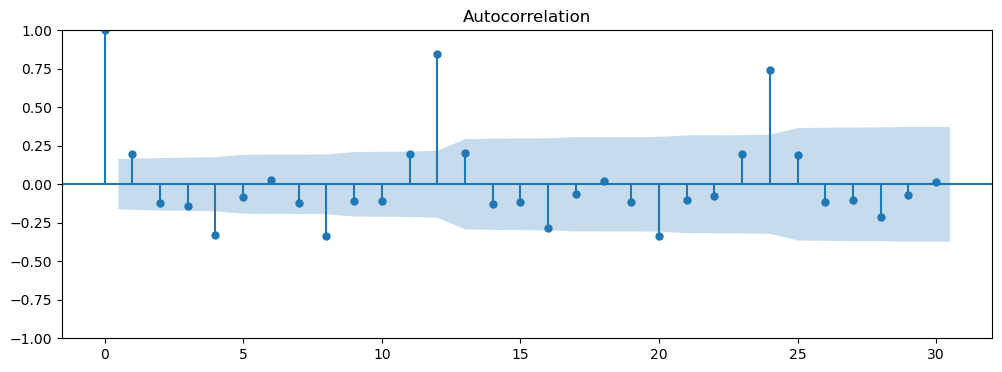

In [122]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,4))
acf = plot_acf(data_boxcox_diff,ax = plt.gca(),lags=30)
plt.show()

### Partial Autocorrelation Function(PACF) plot

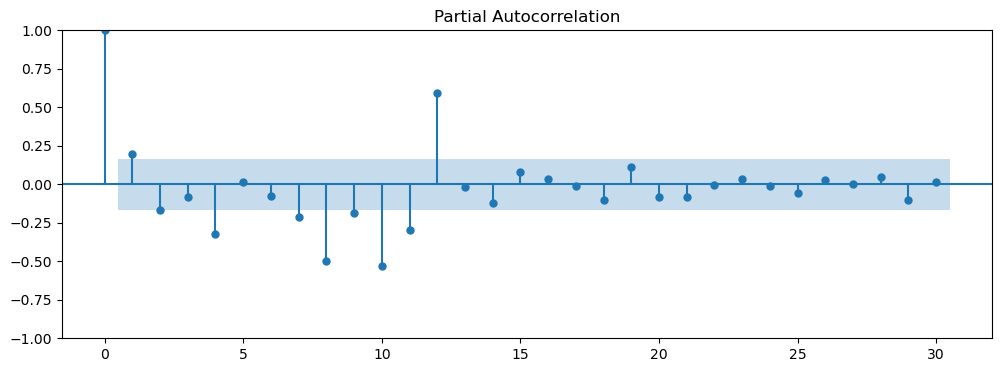

In [123]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff,ax=plt.gca(),lags=30)
plt.show()

### Split into train and test data

In [125]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto Regressive Method(AR)

In [127]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const     0.009473
ar.L1     0.183106
sigma2    0.010680
dtype: float64


C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Recover original time series forecast

In [134]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

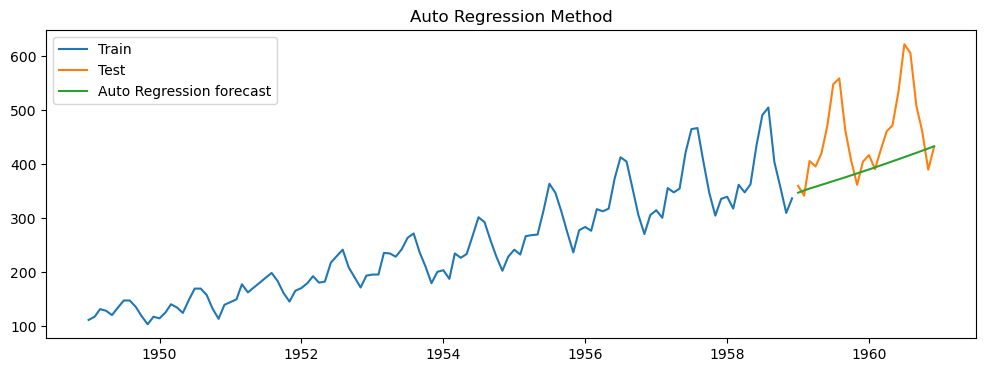

In [136]:
## Plot train, test and forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():],label='Auto Regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [137]:
## Rmse and mape values
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_ar['ar_forecast'][test.index.min():]))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers']))*100,2)
results.loc[len(results)] = ['Auto Regression(AR) Method',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54
3,Simple Exponential Smoothing,107.65,16.49
4,Holts Exponential Smoothing,80.91,11.39
5,Holt Winters Additive Method,35.87,6.72
6,Holt Winters Multiplicative Method,32.45,6.45
7,Auto Regression(AR) Method,93.49,13.78


### Moving Average Method(MA)

In [139]:
model = ARIMA(train_data_boxcox_diff,order=(0,0,1))
model_fit = model.fit()
print(model_fit.params)

const     0.009533
ma.L1     0.266099
sigma2    0.010515
dtype: float64


C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Recovering original time series data

In [141]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

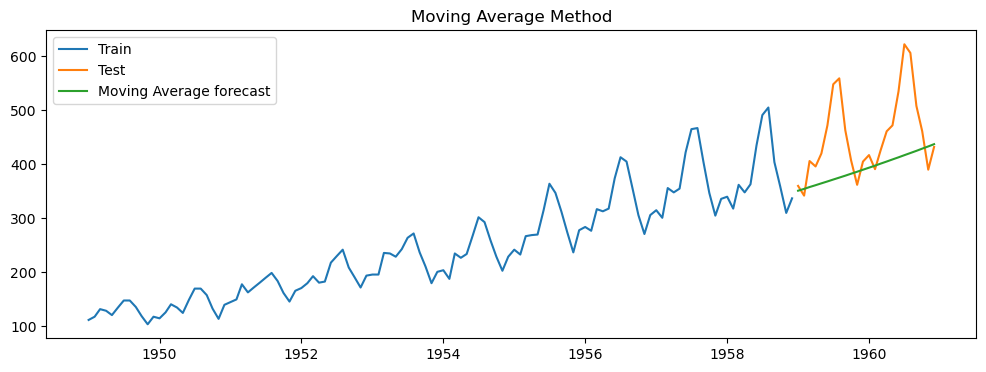

In [142]:
## Plot train, test and forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():],label='Moving Average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [143]:
## Rmse and mape values
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_ma['ma_forecast'][test.index.min():]))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers']))*100,2)
results.loc[len(results)] = ['Auto Regression(AR) Method',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54
3,Simple Exponential Smoothing,107.65,16.49
4,Holts Exponential Smoothing,80.91,11.39
5,Holt Winters Additive Method,35.87,6.72
6,Holt Winters Multiplicative Method,32.45,6.45
7,Auto Regression(AR) Method,93.49,13.78
8,Auto Regression(AR) Method,91.35,13.41


### Auto Regressive Moving Average(ARMA) Method

In [192]:
model = ARIMA(train_data_boxcox_diff,order=(1,0,1))
model_fit = model.fit()
print(model_fit.params)

const     0.009618
ar.L1    -0.527079
ma.L1     0.798271
sigma2    0.010051
dtype: float64


C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Recovering original time series data

In [193]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

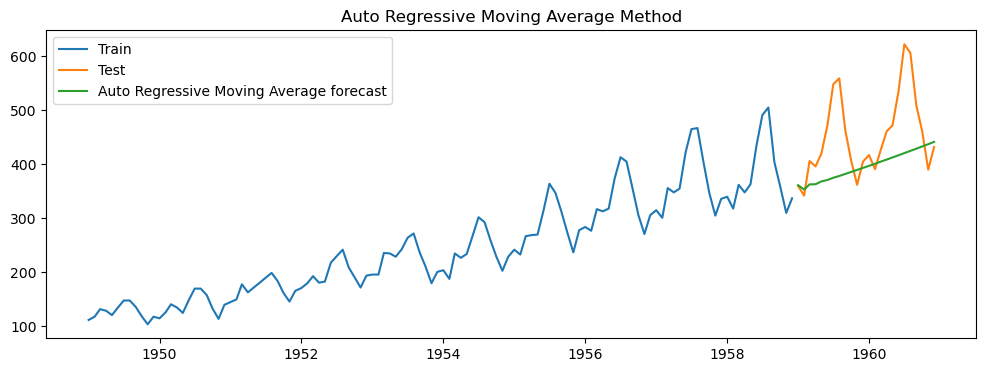

In [194]:
## Plot train, test and forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():],label='Auto Regressive Moving Average forecast')
plt.legend(loc='best')
plt.title('Auto Regressive Moving Average Method')
plt.show()

In [195]:
## Rmse and mape values
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_arma['arma_forecast'][test.index.min():]))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers']))*100,2)
results.loc[len(results)] = ['Auto Regressive Moving Average(ARMA) Method',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54
3,Simple Exponential Smoothing,107.65,16.49
4,Holts Exponential Smoothing,80.91,11.39
5,Holt Winters Additive Method,35.87,6.72
6,Holt Winters Multiplicative Method,32.45,6.45
7,Auto Regression(AR) Method,93.49,13.78
8,Auto Regressive Moving Average(ARMA) Method,89.06,12.91


### Auto Regressive Integrated Moving Average(ARIMA) Method

In [247]:
model = ARIMA(train_data_boxcox,order=(1,1,1))
model_fit = model.fit()
print(model_fit.params)

ar.L1    -0.522125
ma.L1     0.796177
sigma2    0.010117
dtype: float64


C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Recover the original time series

In [248]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

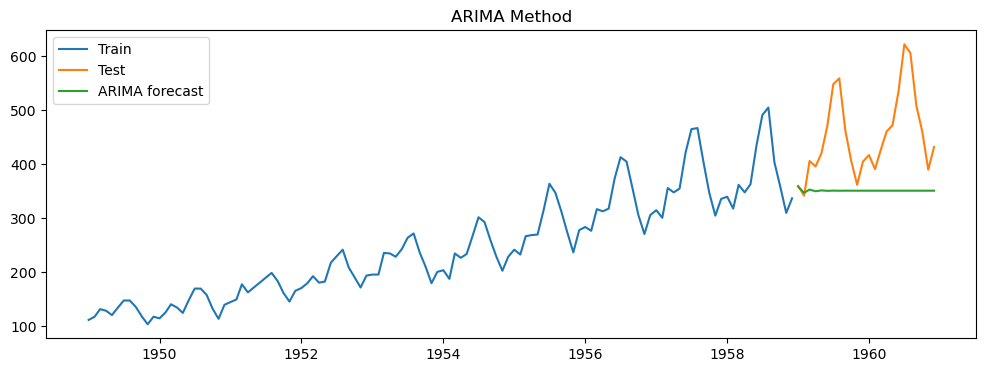

In [249]:
## Plot train, test and forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():],label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

In [250]:
## Rmse and mape values
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_arima['arima_forecast'][test.index.min():]))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers']))*100,2)
results.loc[len(results)] = ['Auto Regressive Integrated Moving Average(ARIMA) Method',rmse,mape]

In [254]:
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54
3,Simple Exponential Smoothing,107.65,16.49
4,Holts Exponential Smoothing,80.91,11.39
5,Holt Winters Additive Method,35.87,6.72
6,Holt Winters Multiplicative Method,32.45,6.45
7,Auto Regression(AR) Method,93.49,13.78
8,Auto Regressive Moving Average(ARMA) Method,89.06,12.91
9,Auto Regressive Integrated Moving Average(ARIM...,125.82,20.50


### Seasonal Autoregressive Integrated Moving Average(SARIMA)

In [256]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model  = SARIMAX(train_data_boxcox,order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ar.L1       0.393434
ma.L1      -0.682865
ar.S.L12   -0.040230
ma.S.L12   -0.518020
sigma2      0.001405
dtype: float64


### Recover original time series forecast

In [257]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.forecast(len(test))
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

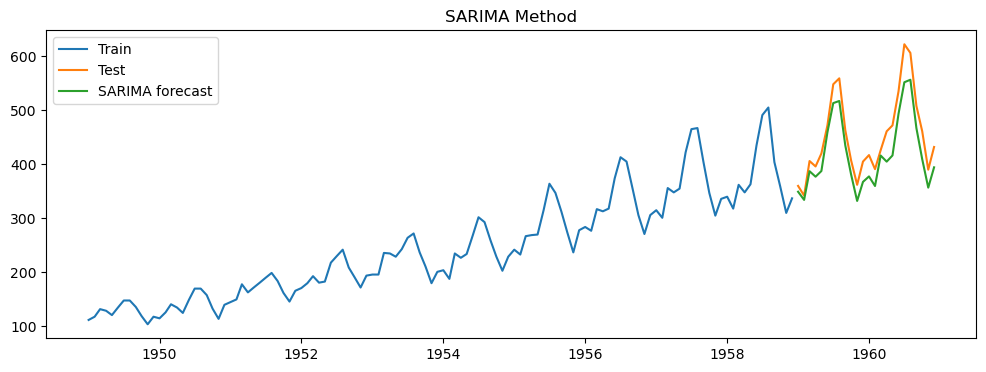

In [258]:
## Plot train, test and forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():],label='SARIMA forecast')
plt.legend(loc='best')
plt.title('SARIMA Method')
plt.show()

In [261]:
## Rmse and mape values
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_sarima['sarima_forecast']))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_sarima['sarima_forecast'])/test['Passengers']))*100,2)
results.loc[len(results)] = ['SARIMA Method',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54
3,Simple Exponential Smoothing,107.65,16.49
4,Holts Exponential Smoothing,80.91,11.39
5,Holt Winters Additive Method,35.87,6.72
6,Holt Winters Multiplicative Method,32.45,6.45
7,Auto Regression(AR) Method,93.49,13.78
8,Auto Regressive Moving Average(ARMA) Method,89.06,12.91
9,Auto Regressive Integrated Moving Average(ARIM...,125.82,20.50


### Seasonal auto Regressive integrated Moving Average with external variables(SARIMAX)

In [263]:
promotion = pd.read_csv('promotion.csv',header=None)
promotion.columns = ['Month','Event']
promotion.head()

,Month,Event
0,1949-01,0
1,1949-02,0
2,1949-03,0
3,1949-04,0
4,1949-05,0


In [265]:
promotion['Month'] = pd.to_datetime(promotion['Month'],format='%Y-%m')
promotion = promotion.set_index('Month')
promotion.head()

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0


In [266]:
promotion['Event'].value_counts()

0    110
1     34
Name: Event, dtype: int64

In [268]:
promo_train = promotion[:train_len]
promo_test = promotion[train_len:]

In [269]:
model = SARIMAX(train_data_boxcox,order=(1,1,1),seasonal_order=(1,1,1,12),exog=promo_train)
model_fit = model.fit()
print(model_fit.params)

C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Prince\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Event       0.034248
ar.L1       0.476657
ma.L1      -0.739978
ar.S.L12   -0.064817
ma.S.L12   -0.557434
sigma2      0.001333
dtype: float64


### Recover original time series forecast

In [271]:
y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_boxcox'] = model_fit.predict(test.index.min(),test.index.max(),exog=promo_test)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_boxcox'])

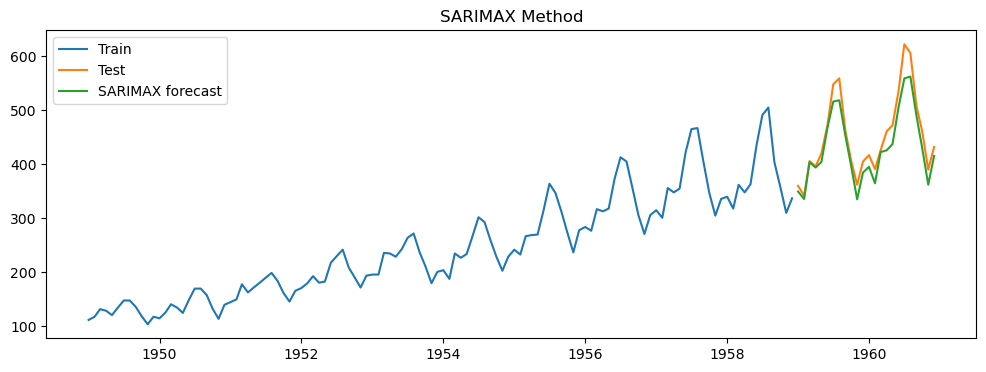

In [272]:
## Plot train, test and forecast data
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label='Train')
plt.plot(test['Passengers'],label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():],label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX Method')
plt.show()

In [273]:
## Rmse and mape values
rmse = np.sqrt(np.mean(mean_squared_error(test['Passengers'],y_hat_sarimax['sarimax_forecast']))).round(2)
mape = np.round((np.mean(np.abs(test['Passengers']-y_hat_sarimax['sarimax_forecast'])/test['Passengers']))*100,2)
results.loc[len(results)] = ['SARIMAX Method',rmse,mape]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63
1,Simple Average Method,219.69,44.28
2,Simple Moving Average,103.33,15.54
3,Simple Exponential Smoothing,107.65,16.49
4,Holts Exponential Smoothing,80.91,11.39
5,Holt Winters Additive Method,35.87,6.72
6,Holt Winters Multiplicative Method,32.45,6.45
7,Auto Regression(AR) Method,93.49,13.78
8,Auto Regressive Moving Average(ARMA) Method,89.06,12.91
9,Auto Regressive Integrated Moving Average(ARIM...,125.82,20.50
